In [1]:
import tensorflow as tf



source_dir = "C:/Users/User/OneDrive/Desktop/KLASIK TAIDI/Semester 6/Bangkit/Capstone/archive/Dataset BISINDO/datatrain"

validate_dir = "C:/Users/User/OneDrive/Desktop/KLASIK TAIDI/Semester 6/Bangkit/Capstone/archive/Dataset BISINDO/datatest"


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    fill_mode = 'nearest',
                    interpolation_order=1,
                    
                    )

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.99
                    )

In [3]:


train_generator = train_datagen.flow_from_directory(
        source_dir,  # direktori data latih
        subset='training',
        batch_size=32,
        target_size=(150, 150),
        shuffle=True,
        class_mode='categorical')




validation_generator = test_datagen.flow_from_directory(
        validate_dir,
        batch_size=32,
        subset='validation',
        target_size=(150, 150),
        shuffle=True,
        class_mode='categorical'
        )






Found 1663 images belonging to 26 classes.
Found 390 images belonging to 26 classes.


In [4]:
# Convert the generator to a tf.data.Dataset
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,26), dtype=tf.float32)
    )
).repeat()

validation_dataset = tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,26), dtype=tf.float32)
    )
).repeat()

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.90:
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout


model = Sequential()
model.add(Conv2D(64,kernel_size= (3,3), strides = 1, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 2, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024, activation='relu')),
model.add(Dropout(0.5)),
model.add(Dense(26, activation='softmax'))

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 36, 36, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │        26,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,101,130 (4.20 MB)

 Trainable params: 1,101,130 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:


model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])



In [9]:


# Train the model
history = model.fit(
    train_dataset,
    epochs=100,
    steps_per_epoch=train_generator.samples // 32,  # adjust steps_per_epoch based on batch size
    validation_data=validation_dataset,
    validation_steps=validation_generator.samples // 32,  # adjust validation_steps based on batch size
    verbose=1,
   
)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 190s 4s/step - accuracy: 0.0470 - loss: 3.2750 - val_accuracy: 0.1120 - val_loss: 3.2215
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.1048 - loss: 3.1835 - val_accuracy: 0.2291 - val_loss: 2.9154
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.1980 - loss: 2.8562 - val_accuracy: 0.4162 - val_loss: 2.1944
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.3489 - loss: 2.2329 - val_accuracy: 0.5978 - val_loss: 1.6857
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.3787 - loss: 2.0749 - val_accuracy: 0.5922 - val_loss: 1.5107
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.4567 - loss: 1.7626 - val_accuracy: 0.5419 - val_loss: 1.5097
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.4683 - loss: 1.7153 - val_accuracy: 0.6508 - val_loss: 1.2157
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.5579 - loss: 1.4576 - val_accuracy: 0.

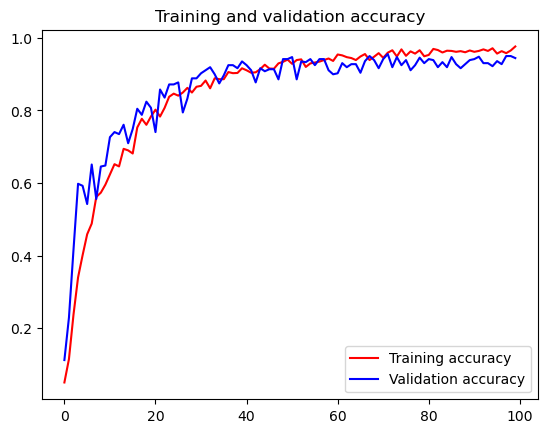

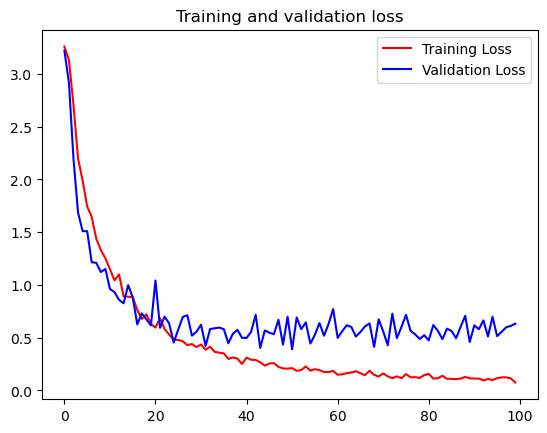

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')

plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')

plt.plot(epochs, val_loss, 'b', label='Validation Loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()

In [11]:
Valclass = validation_generator.class_indices
print(Valclass)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


# Define the validation directory
validate_dir = "C:/Users/User/OneDrive/Desktop/KLASIK TAIDI/Semester 6/Bangkit/Capstone/archive/Dataset BISINDO/datatest"

# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    validate_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Get the total number of test samples
num_test_samples = test_generator.samples

# Predict the labels for the test dataset
y_pred = model.predict(test_generator, steps=num_test_samples // 32)
y_pred_class = np.argmax(y_pred, axis=1)

# Get the true labels from the test dataset
y_true = test_generator.classes

# Create a confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_class)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Calculate the accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_true, y_pred_class)
precision = precision_score(y_true, y_pred_class, average='weighted')
recall = recall_score(y_true, y_pred_class, average='weighted')
f1 = f1_score(y_true, y_pred_class, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the class labels (A-Z)
class_labels = [chr(i) for i in range(ord('A'), ord('Z')+1)]
print("Class Labels:", class_labels)






Found 416 images belonging to 26 classes.


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step
Confusion Matrix:
[[0 1 2 1 0 0 0 0 0 0 0 0 1 1 0 2 1 1 0 0 1 3 0 0 2 0]
 [1 1 2 1 0 0 0 0 1 0 1 0 0 1 3 0 2 0 0 1 0 1 1 0 0 0]
 [1 0 1 2 0 0 2 1 0 0 1 0 0 0 2 1 1 0 0 1 0 2 0 0 0 1]
 [2 2 0 0 3 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 2 0]
 [0 4 1 1 2 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1]
 [0 0 0 1 1 0 1 0 1 0 2 0 1 0 0 1 1 2 1 0 0 1 0 1 2 0]
 [0 1 1 0 1 0 1 1 0 1 1 1 2 0 0 0 0 1 0 0 0 5 0 0 0 0]
 [0 2 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 2 3]
 [0 1 0 2 1 0 1 1 3 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0]
 [0 1 0 0 1 0 0 2 1 1 0 0 2 1 1 1 1 0 1 1 0 0 1 0 1 0]
 [1 0 4 0 0 2 0 0 2 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1]
 [0 0 2 1 0 0 0 1 0 0 1 0 0 3 0 0 2 1 2 0 0 2 0 0 1 0]
 [0 1 0 1 2 0 1 0 1 2 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 3]
 [3 0 2 0 1 1 1 1 1 1 1 0 0 0 3 0 0 0 0 0 0 0 1 0 0 0]
 [2 0 0 3 1 0 2 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1]
 [0 0 3 1 0 1 2 0 0 0 0 0 0 0 1 2 0 2 1 0 0 1 1 0 0 1]
 [0 0 0 0 0 0 0 1 0 1 1 1 1 2 2 0 1 0 2 2 0 0 1 1 0 0]
 [1 0 0 

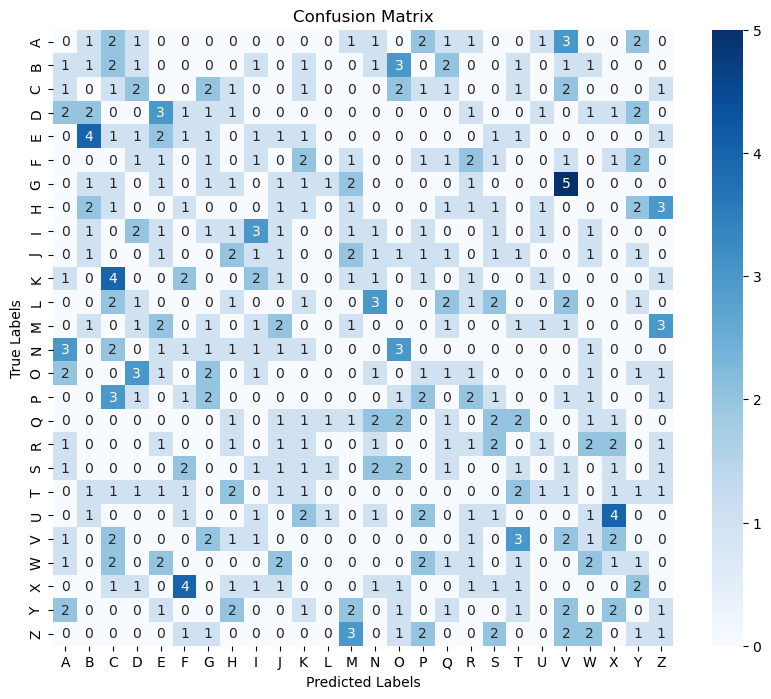

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


conf_mat_df = pd.DataFrame(conf_mat, index=class_labels, columns=class_labels)

# Plot the confusion matrix using Seaborn



plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the Keras H5 model
model = load_model('model.h5')

# Save the model as a TensorFlow SavedModel
tf.saved_model.save(model, 'model_saved')


# Convert the SavedModel to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model, allow_fused=False)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: model_saved\assets


INFO:tensorflow:Assets written to: model_saved\assets


TypeError: TFLiteConverterV2.from_keras_model() got an unexpected keyword argument 'allow_fused'

In [15]:
# import cv2
# import numpy as np

# # Load the trained model
# try:
#     model = tf.keras.models.load_model('model.h5')
# except Exception as e:
#     print(f"Error loading model: {e}")
#     exit(1)

# # Define the video capture device (e.g. webcam)
# cap = cv2.VideoCapture(0)

# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Preprocess the frame
#     img = cv2.resize(frame, (150, 150))  # resize to match training image size
#     img = img / 255.0  # normalize pixel values to [0, 1]
#     img = np.expand_dims(img, axis=0)  # add batch dimension

#     # Make predictions
#     predictions = model.predict(img)

#     # Get the predicted class label
#     predicted_class = np.argmax(predictions)
#     class_label = chr(predicted_class + ord('A'))

#     # Draw the class label on the frame
#     cv2.putText(frame, class_label, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

#     # Display the output
#     cv2.imshow('Webcam', frame)

#     # Exit on key press
#     if cv2.waitKey(1) == ord('q'):
#         break

# # Release the webcam and close the window
# cap.release()
# cv2.destroyAllWindows()

Dibuat oleh  Klasik Solafide Kabor Mambri Taidi dengan username klasik_solafide_kabo